In [12]:
# fake_data_builder
# imports
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random
import scipy.stats as stats

# **Final Project**
Marquette Jones <br>
12/13/2023

### Part One:

In [13]:
# Create dataframe
df = pd.DataFrame()

In [14]:
# Functions
def feature_three(group, feature_1, feature_2):
    match group:
        case 'A':
            return (3*(feature_1)-5*(feature_2))
        case 'B':
            return (2*(feature_1))
        case 'C':
            return (-(feature_1)+(feature_2))
        case default:
            return "There was a problem"

In [15]:
# Generate data
id_list = []
grp_list = []
feature_1_list = []
feature_2_list = []
feature_3_list = []
for i in range(800):
    id = "ID"
    num = str((f'{i:03}'))
    id_num = id+num
    id_list.append(id_num)

    grp_letter = ['A', 'B', 'C']
    rand_letter = random.choices(grp_letter, weights=(33.3, 33.3, 33.3), k=1)
    group = rand_letter[0]
    grp_list.append(group)

    feature_1_mu = 2500
    feature_1 = np.random.normal(feature_1_mu, 300, 1)
    feature_1 = int(feature_1[0])  #to prevent warning
    feature_1_list.append(feature_1)

    feature_2_mu = 400
    feature_2 = np.random.normal(feature_2_mu, 15, 1)
    feature_2 = int(feature_2[0])  #to prevent warning
    feature_2_list.append(feature_2)

    feature_3 = feature_three(group=group, feature_1=feature_1, feature_2=feature_2)
    feature_3_list.append(feature_3)

# Add the columns to the Dataframe
df["ID"] = id_list
df["Group"] = grp_list
df["Feature_1"] = feature_1_list
df["Feature_2"] = feature_2_list
df["Feature_3"] = feature_3_list

In [16]:
print(df)

        ID Group  Feature_1  Feature_2  Feature_3
0    ID000     A       2824        366       6642
1    ID001     B       2228        425       4456
2    ID002     C       2241        400      -1841
3    ID003     B       2203        398       4406
4    ID004     B       2430        398       4860
..     ...   ...        ...        ...        ...
795  ID795     A       2840        410       6470
796  ID796     C       2866        378      -2488
797  ID797     C       2273        395      -1878
798  ID798     B       2239        377       4478
799  ID799     A       2402        411       5151

[800 rows x 5 columns]


a. Based on the theoretical distribution of Feature_1, how many samples do you expect to find where the value of the feature is greater than 3000?

In [17]:
# We can find the CDF using X= 3000, mean = 2500, and std = 300.  Subtract it from one and it will give the probability of getting a value greater than 3000. Multiply by 800 to get the number.
cdf = round(stats.norm.cdf(3000, loc=2500, scale=300), 4)
prob_higher_than_3000 = 1-cdf
num_higher_3000 = int(800*(prob_higher_than_3000))
print(num_higher_3000)

38


b. How many samples did you actually find where Feature_1 is greater than 3000?

In [18]:
count = 0
for i in feature_1_list:
    if i > 3000:
        count = count + 1

print("The number of sample/s that were over value 3000: " + str(count))

The number of sample/s that were over value 3000: 42


c. Group the dataset by the Group field and compute the mean and standard deviation of Feature_3 within each group.

In [19]:
df_grouped = df.set_index('Group').sort_index()  # This puts all the As, Bs, and Cs together respectively based on Group - I wasn't sure if that is what you wanted

group_by_feat_3_mean = df.groupby('Group').Feature_3.mean()
print(group_by_feat_3_mean)
group_A_mean = df[df.Group=='A'].Feature_3.mean()
group_B_mean = df[df.Group=='B'].Feature_3.mean()
group_C_mean = df[df.Group=='C'].Feature_3.mean()

group_by_feat_3_std = df.groupby('Group').Feature_3.std()
print(group_by_feat_3_std)
group_A_std = df[df.Group=='A'].Feature_3.std()
group_B_std = df[df.Group=='B'].Feature_3.std()
group_C_std = df[df.Group=='C'].Feature_3.std()

print("\nThe mean of Group A values is: " + str(group_A_mean))
print("The mean of Group B values is: " + str(group_B_mean))
print("The mean of Group C values is: " + str(group_C_mean) + "\n")
print("The std of Group A values is: " + str(group_A_std))
print("The std of Group B values is: " + str(group_B_std))
print("The std of Group C values is: " + str(group_C_std))

Group
A    5457.412017
B    5021.556314
C   -2102.197080
Name: Feature_3, dtype: float64
Group
A    924.108010
B    650.129793
C    301.217465
Name: Feature_3, dtype: float64

The mean of Group A values is: 5457.412017167382
The mean of Group B values is: 5021.556313993174
The mean of Group C values is: -2102.197080291971

The std of Group A values is: 924.1080099170747
The std of Group B values is: 650.1297929444843
The std of Group C values is: 301.217464661472


Make a scatterplot of Feature_3 vs Feature_1.

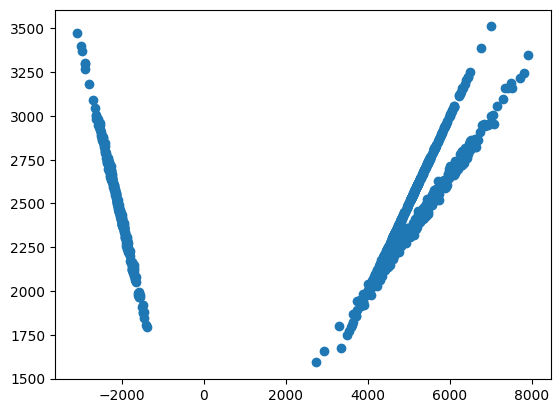

In [20]:
plt.scatter(df['Feature_3'], df['Feature_1'])

Write your constructed dataframe/tibble to a csv file called fake_data.csv

In [21]:
df.to_csv('fake_data.csv')